In [1]:
import pandas as pd
import nltk
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from itertools import product
import matplotlib.pyplot as plt
import statistics

In [2]:
result = pd.read_csv("Balanced Data - 10.csv", encoding = "ISO-8859-1")

In [3]:
y = result['label']
del result['label']
del result['A']
result.drop(result.index[[0]])

,0,1,2,3,4,5,6,7,8,9
1,0.019357,-0.032703,0.014755,0.023291,-0.014277,0.048647,0.044817,-0.026767,0.010160,-0.039739
2,-0.005317,-0.028150,0.042810,0.009068,-0.038983,-0.002316,-0.049711,-0.026537,-0.046922,-0.023367
3,0.199789,-0.031181,0.029352,0.073333,0.026500,-0.069981,-0.123236,0.019211,-0.069022,0.024954
4,0.069245,0.011449,-0.047299,0.028760,-0.008482,-0.036441,0.035892,-0.041610,-0.005396,0.015000
5,0.015406,-0.024612,0.029140,0.047231,0.003870,-0.012833,-0.136829,-0.002424,-0.086185,0.067343
...,...,...,...,...,...,...,...,...,...,...
22678,-0.015031,0.012230,-0.019475,0.017333,-0.022911,-0.005960,-0.028180,0.037463,-0.000798,0.012567
22679,0.099932,-0.040435,0.085135,0.100266,0.070151,0.060244,-0.113940,-0.015113,-0.030140,0.055164
22680,0.041311,-0.091303,0.020814,0.101518,-0.015667,-0.070327,-0.052704,-0.068940,-0.103878,0.068669
22681,0.017614,-0.000007,-0.015729,-0.034741,-0.015515,0.028114,-0.043865,-0.008841,0.018871,-0.022123


C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


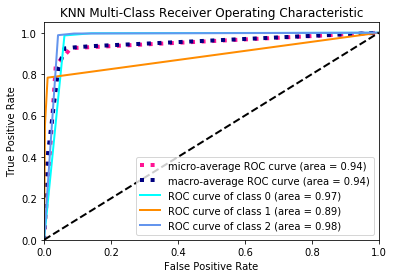

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


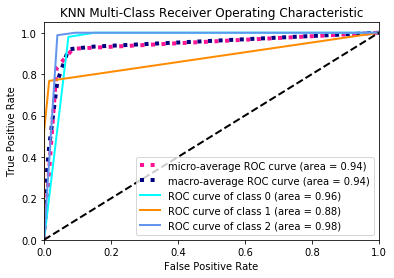

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


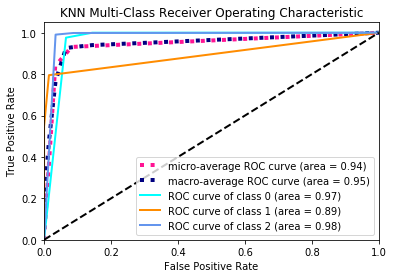

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


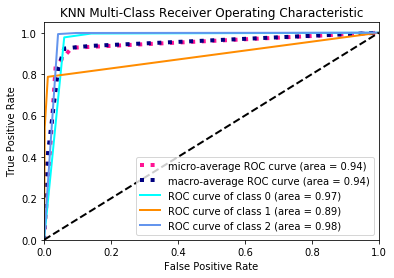

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


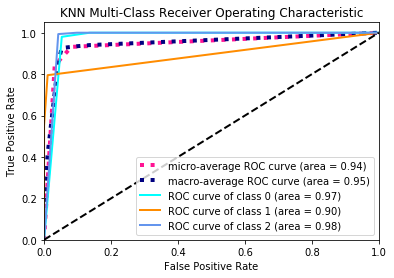

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


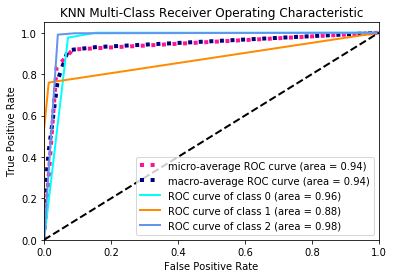

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


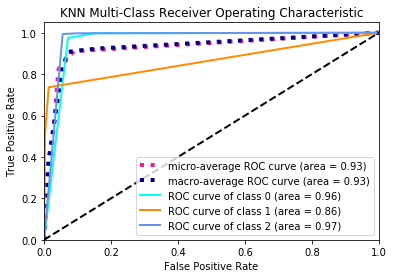

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


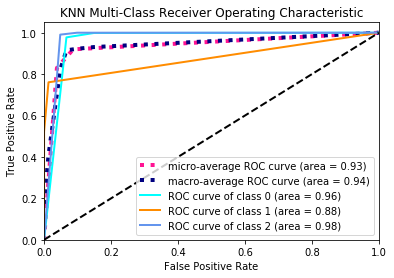

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


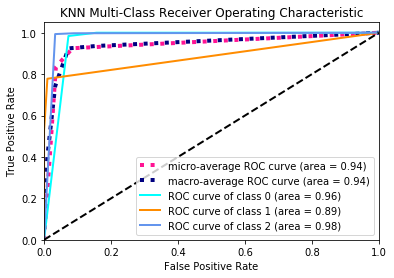

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:63: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


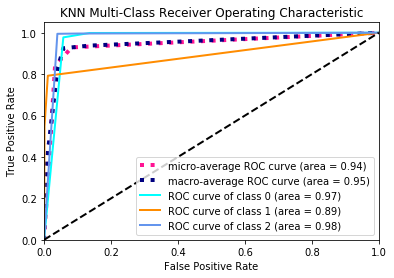

0.9385316370901713

In [4]:
#KNN Grid Search
X_data = result
y_data = y

knn_macro_list = []
knn_micro_list = []
knn_auc_list = []
acc_knn_score1 = []


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(result, y):
    train_news, test_news = result.iloc[train_index], result.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    le = preprocessing.LabelEncoder()
    le.fit(train_labels)
    classes_name=le.classes_
    le.transform(train_labels)
    
    # Binarize the output
    train_labels = le.transform(train_labels)
    test_labels = le.transform(test_labels)
    
    train_labels = label_binarize(train_labels, classes=[0,1,2])
    test_labels = label_binarize(test_labels, classes=[0,1,2])

    n_classes = train_labels.shape[1]
    
    #K-Nearest Neighbour
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                               metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                               weights='uniform')

    acc_knn_score1.append(knn.fit(train_news,train_labels).score(test_news, test_labels))
    
    # Learn to predict each class against the other
    knn_classifier = OneVsRestClassifier(knn)
    knn_score = knn_classifier.fit(train_news, train_labels).predict_proba(test_news)
    acc_knn_score = knn_classifier.score(test_news, test_labels)
    
    # Compute ROC curve and ROC area for each class
    knn_false_positive_rate = dict()
    knn_true_positive_rate = dict()
    knn_roc_auc = dict()
    for i in range(n_classes):
        knn_false_positive_rate[i], knn_true_positive_rate[i], _ = roc_curve(test_labels[:, i], knn_score[:, i])
        knn_roc_auc[i] = auc(knn_false_positive_rate[i], knn_true_positive_rate[i])

    # Compute micro-average ROC curve and ROC area
    knn_false_positive_rate["micro"], knn_true_positive_rate["micro"], _ = roc_curve(test_labels.ravel(), knn_score.ravel())
    knn_roc_auc["micro"] = auc(knn_false_positive_rate["micro"], knn_true_positive_rate["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_knn_fpr = np.unique(np.concatenate([knn_false_positive_rate[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_knn_tpr = np.zeros_like(all_knn_fpr)
    for i in range(n_classes):
        mean_knn_tpr += interp(all_knn_fpr, knn_false_positive_rate[i], knn_true_positive_rate[i])

    # Finally average it and compute AUC
    mean_knn_tpr /= n_classes

    knn_false_positive_rate["macro"] = all_knn_fpr
    knn_true_positive_rate["macro"] = mean_knn_tpr
    knn_roc_auc["macro"] = auc(knn_false_positive_rate["macro"], knn_true_positive_rate["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure()
    plt.plot(knn_false_positive_rate["micro"], knn_true_positive_rate["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(knn_roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(knn_false_positive_rate["macro"], knn_true_positive_rate["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(knn_roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(knn_false_positive_rate[i], knn_true_positive_rate[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, knn_roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('KNN Multi-Class Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    knn_macro_list.append(knn_roc_auc["macro"])
    knn_micro_list.append(knn_roc_auc["micro"])

max(knn_macro_list)
min(knn_macro_list)
np.mean(knn_macro_list)

max(knn_micro_list)
min(knn_micro_list)
np.mean(knn_micro_list)

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


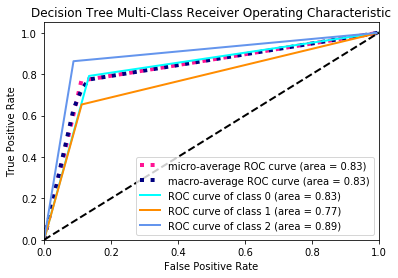

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


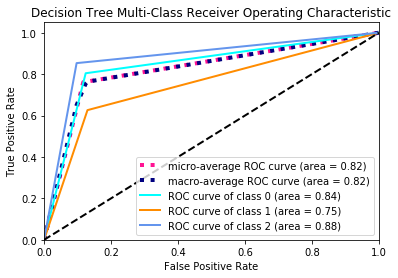

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


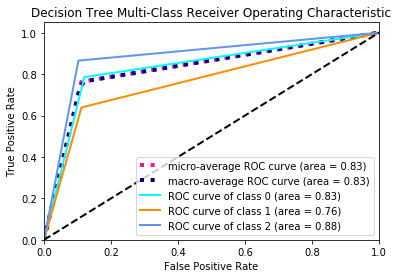

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


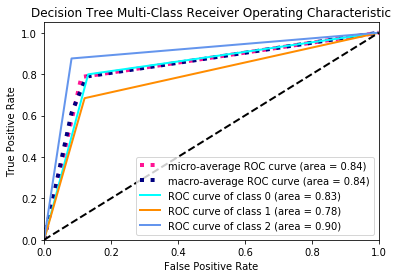

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


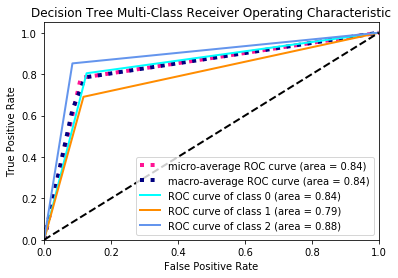

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


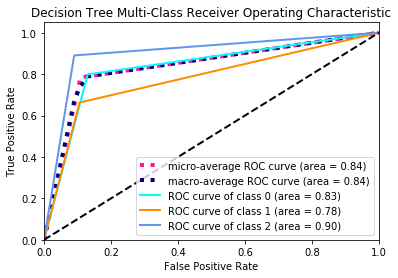

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


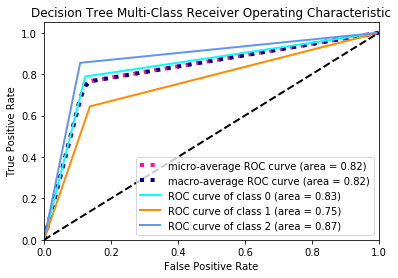

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


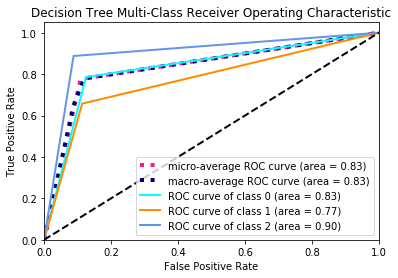

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


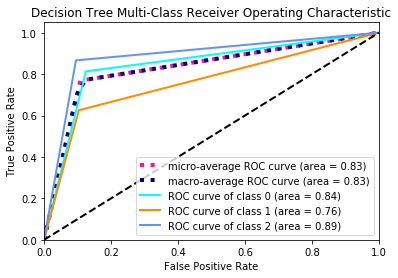

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:64: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


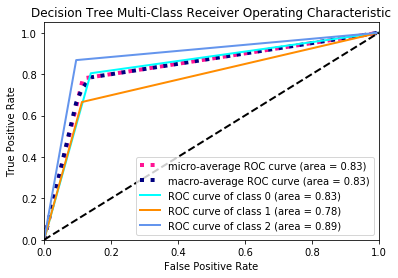

0.8303471449791415

In [5]:
#Decison Tree
decision_tree_macro_list = []
decision_tree_micro_list = []
decision_tree_auc_list = []
acc_decision_tree_score1 = []


from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(result, y):
    train_news, test_news = result.iloc[train_index], result.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    le = preprocessing.LabelEncoder()
    le.fit(train_labels)
    classes_name=le.classes_
    le.transform(train_labels)
    
    # Binarize the output
    train_labels = le.transform(train_labels)
    test_labels = le.transform(test_labels)

    train_labels = label_binarize(train_labels, classes=[0,1,2])
    test_labels = label_binarize(test_labels, classes=[0,1,2])

    n_classes = train_labels.shape[1]

    #Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    decision_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                           max_depth=None, max_features=None, max_leaf_nodes=None,
                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                           min_samples_leaf=1, min_samples_split=2,
                                           min_weight_fraction_leaf=0.0, presort='deprecated',
                                           random_state=None, splitter='best')
    
    acc_decision_tree_score1.append(decision_tree.fit(train_news,train_labels).score(test_news, test_labels))
    
    # Learn to predict each class against the other
    decision_tree_classifier = OneVsRestClassifier(decision_tree)
    decision_tree_score = decision_tree_classifier.fit(train_news, train_labels).predict(test_news)
    acc_decision_tree_score = decision_tree_classifier.score(test_news, test_labels)

    # Compute ROC curve and ROC area for each class
    decision_tree_false_positive_rate = dict()
    decision_tree_true_positive_rate = dict()
    decision_tree_roc_auc = dict()
    for i in range(n_classes):
        decision_tree_false_positive_rate[i], decision_tree_true_positive_rate[i], _ = roc_curve(test_labels[:, i], decision_tree_score[:, i])
        decision_tree_roc_auc[i] = auc(decision_tree_false_positive_rate[i], decision_tree_true_positive_rate[i])

    # Compute micro-average ROC curve and ROC area
    decision_tree_false_positive_rate["micro"], decision_tree_true_positive_rate["micro"], _ = roc_curve(test_labels.ravel(), decision_tree_score.ravel())
    decision_tree_roc_auc["micro"] = auc(decision_tree_false_positive_rate["micro"], decision_tree_true_positive_rate["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_decision_tree_fpr = np.unique(np.concatenate([decision_tree_false_positive_rate[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_decision_tree_tpr = np.zeros_like(all_decision_tree_fpr)
    for i in range(n_classes):
        mean_decision_tree_tpr += interp(all_decision_tree_fpr, decision_tree_false_positive_rate[i], decision_tree_true_positive_rate[i])

    # Finally average it and compute AUC
    mean_decision_tree_tpr /= n_classes

    decision_tree_false_positive_rate["macro"] = all_decision_tree_fpr
    decision_tree_true_positive_rate["macro"] = mean_decision_tree_tpr
    decision_tree_roc_auc["macro"] = auc(decision_tree_false_positive_rate["macro"], decision_tree_true_positive_rate["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(decision_tree_false_positive_rate["micro"], decision_tree_true_positive_rate["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(decision_tree_roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(decision_tree_false_positive_rate["macro"], decision_tree_true_positive_rate["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(decision_tree_roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(decision_tree_false_positive_rate[i], decision_tree_true_positive_rate[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, decision_tree_roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Decision Tree Multi-Class Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    decision_tree_macro_list.append(decision_tree_roc_auc["macro"])
    decision_tree_micro_list.append(decision_tree_roc_auc["micro"])

max(decision_tree_macro_list)
min(decision_tree_macro_list)
np.mean(decision_tree_macro_list)

max(decision_tree_micro_list)
min(decision_tree_micro_list)
np.mean(decision_tree_micro_list)

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


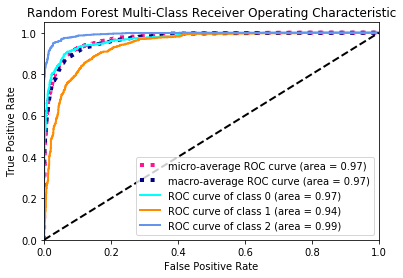

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


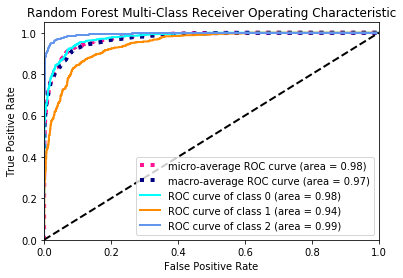

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


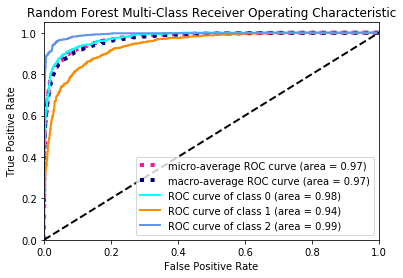

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


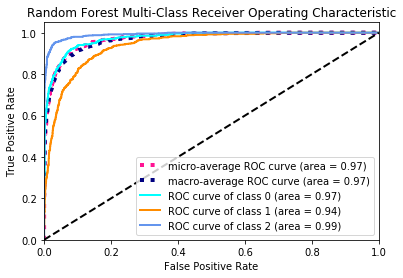

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


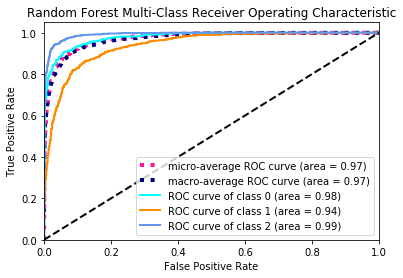

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


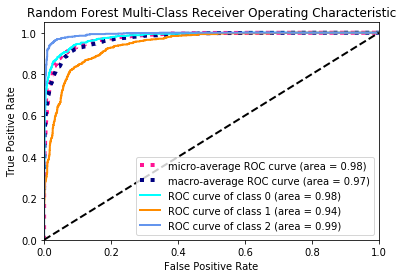

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


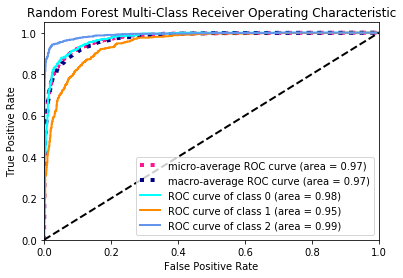

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


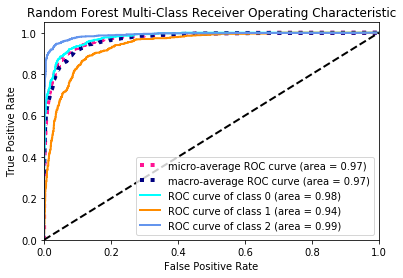

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


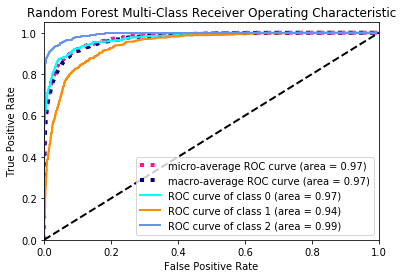

C:\Users\mrahe103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


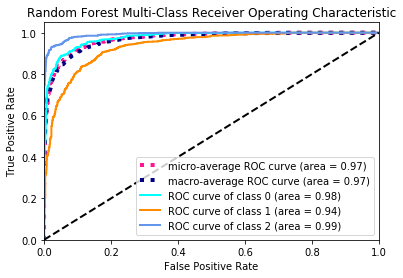

0.9733028694512609

In [6]:
#Random Forest
random_forest_macro_list = []
random_forest_micro_list = []
random_forest_auc_list = []
acc_random_forest_score1 = []

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True)
for train_index, test_index in skf.split(result, y):
    train_news, test_news = result.iloc[train_index], result.iloc[test_index]
    train_labels, test_labels = y[train_index], y[test_index]
    
    le = preprocessing.LabelEncoder()
    le.fit(train_labels)
    classes_name=le.classes_
    le.transform(train_labels)
    
    # Binarize the output
    train_labels = le.transform(train_labels)
    test_labels = le.transform(test_labels)

    train_labels = label_binarize(train_labels, classes=[0,1,2])
    test_labels = label_binarize(test_labels, classes=[0,1,2])

    n_classes = train_labels.shape[1]

    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                           criterion='gini', max_depth=110, max_features=3,
                                           max_leaf_nodes=None, max_samples=None,
                                           min_impurity_decrease=0.0, min_impurity_split=None,
                                           min_samples_leaf=3, min_samples_split=8,
                                           min_weight_fraction_leaf=0.0, n_estimators=20,
                                           n_jobs=None, oob_score=False, random_state=None,
                                           verbose=0, warm_start=False)
    
    acc_random_forest_score1.append(random_forest.fit(train_news,train_labels).score(test_news, test_labels))
    
    # Learn to predict each class against the other
    random_forest_classifier = OneVsRestClassifier(random_forest)
    random_forest_score = random_forest_classifier.fit(train_news, train_labels).predict_proba(test_news)
    acc_random_forest_score = random_forest_classifier.score(test_news, test_labels)

    # Compute ROC curve and ROC area for each class
    random_forest_false_positive_rate = dict()
    random_forest_true_positive_rate = dict()
    random_forest_roc_auc = dict()
    for i in range(n_classes):
        random_forest_false_positive_rate[i], random_forest_true_positive_rate[i], _ = roc_curve(test_labels[:, i],random_forest_score[:, i])
        random_forest_roc_auc[i] = auc(random_forest_false_positive_rate[i], random_forest_true_positive_rate[i])

    # Compute micro-average ROC curve and ROC area
    random_forest_false_positive_rate["micro"], random_forest_true_positive_rate["micro"], _ = roc_curve(test_labels.ravel(), random_forest_score.ravel())
    random_forest_roc_auc["micro"] = auc(random_forest_false_positive_rate["micro"], random_forest_true_positive_rate["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_random_forest_fpr = np.unique(np.concatenate([random_forest_false_positive_rate[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_random_forest_tpr = np.zeros_like(all_random_forest_fpr)
    for i in range(n_classes):
        mean_random_forest_tpr += interp(all_random_forest_fpr, random_forest_false_positive_rate[i], 
                                         random_forest_true_positive_rate[i])

    # Finally average it and compute AUC
    mean_random_forest_tpr /= n_classes

    random_forest_false_positive_rate["macro"] = all_random_forest_fpr
    random_forest_true_positive_rate["macro"] = mean_random_forest_tpr
    random_forest_roc_auc["macro"] = auc(random_forest_false_positive_rate["macro"], random_forest_true_positive_rate["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(random_forest_false_positive_rate["micro"], random_forest_true_positive_rate["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(random_forest_roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(random_forest_false_positive_rate["macro"], random_forest_true_positive_rate["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(random_forest_roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(random_forest_false_positive_rate[i], random_forest_true_positive_rate[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, random_forest_roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest Multi-Class Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    random_forest_macro_list.append(random_forest_roc_auc["macro"])
    random_forest_micro_list.append(random_forest_roc_auc["micro"])

max(random_forest_macro_list)
min(random_forest_macro_list)
np.mean(random_forest_macro_list)

max(random_forest_micro_list)
min(random_forest_micro_list)
np.mean(random_forest_micro_list)


In [7]:
np.mean(acc_knn_score1)

0.8354712663512428

In [8]:
np.mean(acc_decision_tree_score1)

0.7741919693623822

In [9]:
np.mean(acc_random_forest_score1)

0.7729581981822322

In [10]:
acc_knn_score1

[0.8435434111943587,
 0.8298810048479507,
 0.8382547377699427,
 0.8381834215167548,
 0.841710758377425,
 0.8333333333333334,
 0.8249559082892416,
 0.8298059964726632,
 0.8346560846560847,
 0.8403880070546738]

In [11]:
acc_decision_tree_score1

[0.7906566769501984,
 0.7712648743940062,
 0.7642133098281181,
 0.7733686067019401,
 0.7583774250440917,
 0.781305114638448,
 0.7720458553791887,
 0.7857142857142857,
 0.767636684303351,
 0.777336860670194]

In [12]:
acc_random_forest_score1

[0.7659762009695902,
 0.7686205376817982,
 0.7734684883208461,
 0.7680776014109347,
 0.7821869488536155,
 0.7865961199294532,
 0.7751322751322751,
 0.7632275132275133,
 0.7777777777777778,
 0.7685185185185185]